In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
parkinsons_dataset =  pd.read_csv(r"../datasets/parkinsons.csv")

In [3]:
parkinsons_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_dataset.shape

(195, 24)

In [5]:
parkinsons_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


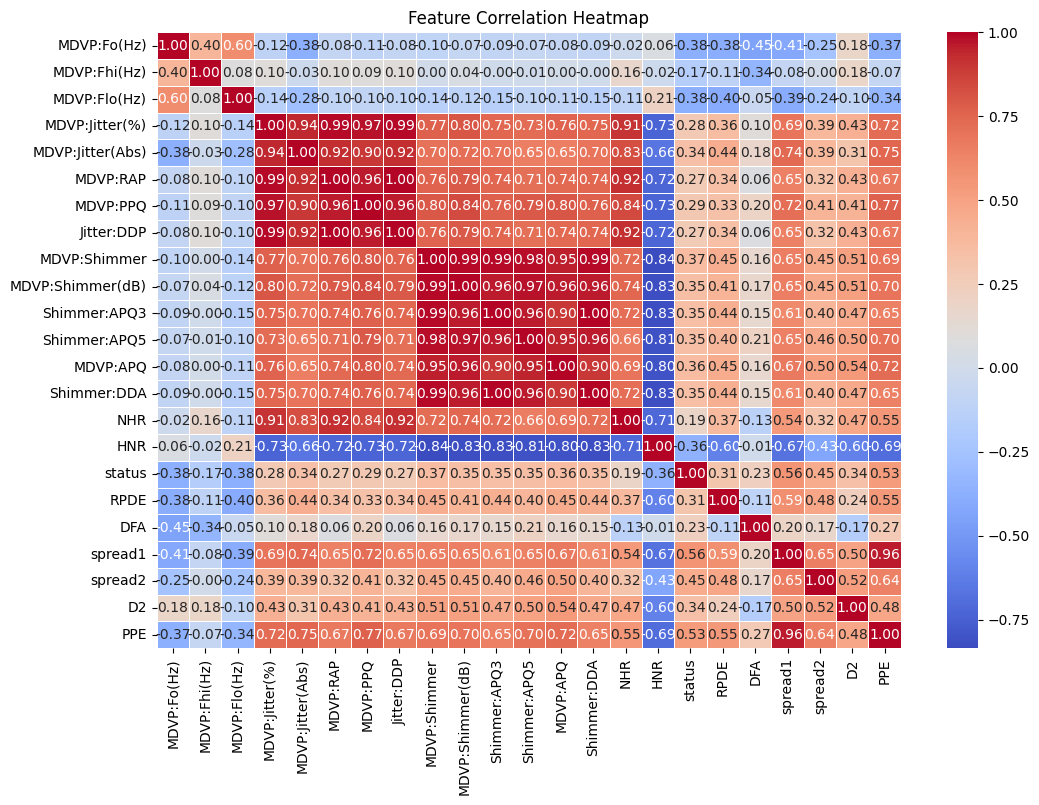

In [6]:
df=parkinsons_dataset
df_numeric = df.drop(columns=["name"])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print("Highly Correlated Features (Correlation > 0.9):")

for column in high_corr_features:
    correlated_with = upper_tri[column][upper_tri[column] > 0.9].index.tolist()
    print(f"{column} is highly correlated with {correlated_with}")

df_reduced = df_numeric.drop(columns=high_corr_features)

print("\nRemaining Columns After Feature Reduction:", df_reduced.columns.tolist())

df_reduced.to_csv("parkinsons_reduced.csv", index=False)

Highly Correlated Features (Correlation > 0.9):
MDVP:Jitter(Abs) is highly correlated with ['MDVP:Jitter(%)']
MDVP:RAP is highly correlated with ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)']
MDVP:PPQ is highly correlated with ['MDVP:Jitter(%)', 'MDVP:RAP']
Jitter:DDP is highly correlated with ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ']
MDVP:Shimmer(dB) is highly correlated with ['MDVP:Shimmer']
Shimmer:APQ3 is highly correlated with ['MDVP:Shimmer', 'MDVP:Shimmer(dB)']
Shimmer:APQ5 is highly correlated with ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3']
MDVP:APQ is highly correlated with ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5']
Shimmer:DDA is highly correlated with ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5']
NHR is highly correlated with ['MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP']
PPE is highly correlated with ['spread1']

Remaining Columns After Feature Reduction: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 

In [8]:
df_reduced.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [9]:
df_reduced['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [10]:
df = df_reduced
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608


In [11]:
X = df.drop(['status'], axis=1)
Y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180


In [13]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
5,120.552,131.162,113.787,0.00968,0.04701,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560
135,110.453,127.611,105.554,0.00494,0.04128,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793
122,138.190,203.522,83.340,0.00704,0.04479,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438
167,260.105,264.919,237.303,0.00339,0.02030,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767
85,180.978,200.125,155.495,0.00406,0.03852,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256


In [14]:
X_test.shape

(39, 11)

In [15]:
model = svm.SVC(kernel='linear')

In [16]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\K.Abhilasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:

filename = 'parkinsons_model.sav'
pickle.dump(model,open(filename,'wb'))